In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import sqrt
import os

TensorFlow version: 2.12.0


In [ ]:
df = pd.read_excel('Li-O_data_new.xlsx')
df.columns.values[6] = "Li_number"
df['num_magnetic_sites']=df['num_magnetic_sites'].astype(float)
df['Sites']=df['Sites'].astype(float)
df = df.fillna(0)
df['Li_number']=df['Li_number'].astype(int)

In [ ]:
df['H_number']=df.remainer.str.extract(r'(?<=H)(\d+)',expand=False).fillna(0).astype(int)
df['He_number']=df.remainer.str.extract(r'(?<=He)(\d+)',expand=False).fillna(0).astype(int)
df['Be_number']=df.remainer.str.extract(r'(?<=Be)(\d+)',expand=False).fillna(0).astype(int)
df['B_number']=df.remainer.str.extract(r'(?<=B)(\d+)',expand=False).fillna(0).astype(int)
df['C_number']=df.remainer.str.extract(r'(?<=C)(\d+)',expand=False).fillna(0).astype(int)
df['N_number']=df.remainer.str.extract(r'(?<=N)(\d+)',expand=False).fillna(0).astype(int)
df['O_number']=df.remainer.str.extract(r'(?<=O)(\d+)',expand=False).fillna(0).astype(int)
df['F_number']=df.remainer.str.extract(r'(?<=F)(\d+)',expand=False).fillna(0).astype(int)
df['Ne_number']=df.remainer.str.extract(r'(?<=Ne)(\d+)',expand=False).fillna(0).astype(int)
df['Na_number']=df.remainer.str.extract(r'(?<=Na)(\d+)',expand=False).fillna(0).astype(int)
df['Mg_number']=df.remainer.str.extract(r'(?<=Mg)(\d+)',expand=False).fillna(0).astype(int)
df['Al_number']=df.remainer.str.extract(r'(?<=Al)(\d+)',expand=False).fillna(0).astype(int)
df['Si_number']=df.remainer.str.extract(r'(?<=Si)(\d+)',expand=False).fillna(0).astype(int)
df['P_number']=df.remainer.str.extract(r'(?<=P)(\d+)',expand=False).fillna(0).astype(int)
df['S_number']=df.remainer.str.extract(r'(?<=S)(\d+)',expand=False).fillna(0).astype(int)
df['Cl_number']=df.remainer.str.extract(r'(?<=Cl)(\d+)',expand=False).fillna(0).astype(int)
df['Ar_number']=df.remainer.str.extract(r'(?<=Ar)(\d+)',expand=False).fillna(0).astype(int)
df['K_number']=df.remainer.str.extract(r'(?<=K)(\d+)',expand=False).fillna(0).astype(int)
df['Ca_number']=df.remainer.str.extract(r'(?<=Ca)(\d+)',expand=False).fillna(0).astype(int)
df['Sc_number']=df.remainer.str.extract(r'(?<=Sc)(\d+)',expand=False).fillna(0).astype(int)
df['Ti_number']=df.remainer.str.extract(r'(?<=Ti)(\d+)',expand=False).fillna(0).astype(int)
df['V_number']=df.remainer.str.extract(r'(?<=V)(\d+)',expand=False).fillna(0).astype(int)
df['Cr_number']=df.remainer.str.extract(r'(?<=Cr)(\d+)',expand=False).fillna(0).astype(int)
df['Mn_number']=df.remainer.str.extract(r'(?<=Mn)(\d+)',expand=False).fillna(0).astype(int)
df['Fe_number']=df.remainer.str.extract(r'(?<=Fe)(\d+)',expand=False).fillna(0).astype(int)
df['Co_number']=df.remainer.str.extract(r'(?<=Co)(\d+)',expand=False).fillna(0).astype(int)
df['Ni_number']=df.remainer.str.extract(r'(?<=Ni)(\d+)',expand=False).fillna(0).astype(int)
df['Cu_number']=df.remainer.str.extract(r'(?<=Cu)(\d+)',expand=False).fillna(0).astype(int)
df['Zn_number']=df.remainer.str.extract(r'(?<=Zn)(\d+)',expand=False).fillna(0).astype(int)
df['Ga_number']=df.remainer.str.extract(r'(?<=Ga)(\d+)',expand=False).fillna(0).astype(int)
df['Ge_number']=df.remainer.str.extract(r'(?<=Ge)(\d+)',expand=False).fillna(0).astype(int)
df['As_number']=df.remainer.str.extract(r'(?<=As)(\d+)',expand=False).fillna(0).astype(int)
df['Se_number']=df.remainer.str.extract(r'(?<=Se)(\d+)',expand=False).fillna(0).astype(int)
df['Br_number']=df.remainer.str.extract(r'(?<=Br)(\d+)',expand=False).fillna(0).astype(int)
df['Kr_number']=df.remainer.str.extract(r'(?<=Kr)(\d+)',expand=False).fillna(0).astype(int)
df['Rb_number']=df.remainer.str.extract(r'(?<=Rb)(\d+)',expand=False).fillna(0).astype(int)
df['Sr_number']=df.remainer.str.extract(r'(?<=Sr)(\d+)',expand=False).fillna(0).astype(int)
df['Y_number']=df.remainer.str.extract(r'(?<=Y)(\d+)',expand=False).fillna(0).astype(int)
df['Zr_number']=df.remainer.str.extract(r'(?<=Zr)(\d+)',expand=False).fillna(0).astype(int)
df['Nb_number']=df.remainer.str.extract(r'(?<=Nb)(\d+)',expand=False).fillna(0).astype(int)
df['Mo_number']=df.remainer.str.extract(r'(?<=Mo)(\d+)',expand=False).fillna(0).astype(int)
df['Tc_number']=df.remainer.str.extract(r'(?<=Tc)(\d+)',expand=False).fillna(0).astype(int)
df['Ru_number']=df.remainer.str.extract(r'(?<=Ru)(\d+)',expand=False).fillna(0).astype(int)
df['Rh_number']=df.remainer.str.extract(r'(?<=Rh)(\d+)',expand=False).fillna(0).astype(int)
df['Pd_number']=df.remainer.str.extract(r'(?<=Pd)(\d+)',expand=False).fillna(0).astype(int)
df['Ag_number']=df.remainer.str.extract(r'(?<=Ag)(\d+)',expand=False).fillna(0).astype(int)
df['Cd_number']=df.remainer.str.extract(r'(?<=Cd)(\d+)',expand=False).fillna(0).astype(int)
df['In_number']=df.remainer.str.extract(r'(?<=In)(\d+)',expand=False).fillna(0).astype(int)
df['Sn_number']=df.remainer.str.extract(r'(?<=Sn)(\d+)',expand=False).fillna(0).astype(int)
df['Sb_number']=df.remainer.str.extract(r'(?<=Sb)(\d+)',expand=False).fillna(0).astype(int)
df['Te_number']=df.remainer.str.extract(r'(?<=Te)(\d+)',expand=False).fillna(0).astype(int)
df['I_number']=df.remainer.str.extract(r'(?<=I)(\d+)',expand=False).fillna(0).astype(int)
df['Xe_number']=df.remainer.str.extract(r'(?<=Xe)(\d+)',expand=False).fillna(0).astype(int)
df['Cs_number']=df.remainer.str.extract(r'(?<=Cs)(\d+)',expand=False).fillna(0).astype(int)
df['Ba_number']=df.remainer.str.extract(r'(?<=Ba)(\d+)',expand=False).fillna(0).astype(int)
df['La_number']=df.remainer.str.extract(r'(?<=La)(\d+)',expand=False).fillna(0).astype(int)
df['Ce_number']=df.remainer.str.extract(r'(?<=Ce)(\d+)',expand=False).fillna(0).astype(int)
df['Pr_number']=df.remainer.str.extract(r'(?<=Pr)(\d+)',expand=False).fillna(0).astype(int)
df['Nd_number']=df.remainer.str.extract(r'(?<=Nd)(\d+)',expand=False).fillna(0).astype(int)
df['Pm_number']=df.remainer.str.extract(r'(?<=Pm)(\d+)',expand=False).fillna(0).astype(int)
df['Sm_number']=df.remainer.str.extract(r'(?<=Sm)(\d+)',expand=False).fillna(0).astype(int)
df['Eu_number']=df.remainer.str.extract(r'(?<=Eu)(\d+)',expand=False).fillna(0).astype(int)
df['Gd_number']=df.remainer.str.extract(r'(?<=Gd)(\d+)',expand=False).fillna(0).astype(int)
df['Tb_number']=df.remainer.str.extract(r'(?<=Tb)(\d+)',expand=False).fillna(0).astype(int)
df['Dy_number']=df.remainer.str.extract(r'(?<=Dy)(\d+)',expand=False).fillna(0).astype(int)
df['Ho_number']=df.remainer.str.extract(r'(?<=Ho)(\d+)',expand=False).fillna(0).astype(int)
df['Er_number']=df.remainer.str.extract(r'(?<=Er)(\d+)',expand=False).fillna(0).astype(int)
df['Tm_number']=df.remainer.str.extract(r'(?<=Tm)(\d+)',expand=False).fillna(0).astype(int)
df['Yb_number']=df.remainer.str.extract(r'(?<=Yb)(\d+)',expand=False).fillna(0).astype(int)
df['Lu_number']=df.remainer.str.extract(r'(?<=Lu)(\d+)',expand=False).fillna(0).astype(int)
df['Hf_number']=df.remainer.str.extract(r'(?<=Hf)(\d+)',expand=False).fillna(0).astype(int)
df['Ta_number']=df.remainer.str.extract(r'(?<=Ta)(\d+)',expand=False).fillna(0).astype(int)
df['W_number']=df.remainer.str.extract(r'(?<=W)(\d+)',expand=False).fillna(0).astype(int)
df['Re_number']=df.remainer.str.extract(r'(?<=Re)(\d+)',expand=False).fillna(0).astype(int)
df['Os_number']=df.remainer.str.extract(r'(?<=Os)(\d+)',expand=False).fillna(0).astype(int)
df['Ir_number']=df.remainer.str.extract(r'(?<=Ir)(\d+)',expand=False).fillna(0).astype(int)
df['Pt_number']=df.remainer.str.extract(r'(?<=Pt)(\d+)',expand=False).fillna(0).astype(int)
df['Au_number']=df.remainer.str.extract(r'(?<=Au)(\d+)',expand=False).fillna(0).astype(int)
df['Hg_number']=df.remainer.str.extract(r'(?<=Hg)(\d+)',expand=False).fillna(0).astype(int)
df['Tl_number']=df.remainer.str.extract(r'(?<=Tl)(\d+)',expand=False).fillna(0).astype(int)
df['Pb_number']=df.remainer.str.extract(r'(?<=Pb)(\d+)',expand=False).fillna(0).astype(int)
df['Bi_number']=df.remainer.str.extract(r'(?<=Bi)(\d+)',expand=False).fillna(0).astype(int)
df['Po_number']=df.remainer.str.extract(r'(?<=Po)(\d+)',expand=False).fillna(0).astype(int)
df['At_number']=df.remainer.str.extract(r'(?<=At)(\d+)',expand=False).fillna(0).astype(int)
df['Rn_number']=df.remainer.str.extract(r'(?<=Rn)(\d+)',expand=False).fillna(0).astype(int)
df['Fr_number']=df.remainer.str.extract(r'(?<=Fr)(\d+)',expand=False).fillna(0).astype(int)
df['Ra_number']=df.remainer.str.extract(r'(?<=Ra)(\d+)',expand=False).fillna(0).astype(int)
df['Ac_number']=df.remainer.str.extract(r'(?<=Ac)(\d+)',expand=False).fillna(0).astype(int)
df['Th_number']=df.remainer.str.extract(r'(?<=Th)(\d+)',expand=False).fillna(0).astype(int)
df['Pa_number']=df.remainer.str.extract(r'(?<=Pa)(\d+)',expand=False).fillna(0).astype(int)
df['U_number']=df.remainer.str.extract(r'(?<=U)(\d+)',expand=False).fillna(0).astype(int)
df['Np_number']=df.remainer.str.extract(r'(?<=Np)(\d+)',expand=False).fillna(0).astype(int)
df['Pu_number']=df.remainer.str.extract(r'(?<=Pu)(\d+)',expand=False).fillna(0).astype(int)
df['Am_number']=df.remainer.str.extract(r'(?<=Am)(\d+)',expand=False).fillna(0).astype(int)
df['Cm_number']=df.remainer.str.extract(r'(?<=Cm)(\d+)',expand=False).fillna(0).astype(int)
df['Bk_number']=df.remainer.str.extract(r'(?<=Bk)(\d+)',expand=False).fillna(0).astype(int)
df['Cf_number']=df.remainer.str.extract(r'(?<=Cf)(\d+)',expand=False).fillna(0).astype(int)
df['Es_number']=df.remainer.str.extract(r'(?<=Es)(\d+)',expand=False).fillna(0).astype(int)
df['Fm_number']=df.remainer.str.extract(r'(?<=Fm)(\d+)',expand=False).fillna(0).astype(int)


<ipython-input-3-9cb470ba0858>:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Pu_number']=df.remainer.str.extract(r'(?<=Pu)(\d+)',expand=False).fillna(0).astype(int)
<ipython-input-3-9cb470ba0858>:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Am_number']=df.remainer.str.extract(r'(?<=Am)(\d+)',expand=False).fillna(0).astype(int)
<ipython-input-3-9cb470ba0858>:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

In [ ]:
list="H","He","Be","B","C","N","O","F","Ne","Na","Mg","Al","Si","P","S","Cl","Ar","K","Ca","Sc","Ti","V","Cr","Mn","Fe","Co","Ni","Cu","Zn","Ga","Ge","As","Se","Br","Kr","Rb","Sr","Y","Zr","Nb","Mo","Tc","Ru","Rh","Pd","Ag","Cd","In","Sn","Sb","Te","I","Xe","Cs","Ba","La","Ce","Pr","Nd","Pm","Sm","Eu","Gd","Tb","Dy","Ho","Er","Tm","Yb","Lu","Hf","Ta","W","Re","Os","Ir","Pt","Au","Hg","Tl","Pb","Bi","Po","At","Rn","Fr","Ra","Ac","Th","Pa","U","Np","Pu","Am","Cm","Bk","Cf","Es","Fm"
for e in list:
  a = e+"_number"
  print("number of entries with",e,"=",np.count_nonzero(df[a]))

number of entries with H = 473
number of entries with He = 0
number of entries with Be = 7
number of entries with B = 697
number of entries with C = 676
number of entries with N = 35
number of entries with O = 12459
number of entries with F = 1021
number of entries with Ne = 0
number of entries with Na = 10
number of entries with Mg = 136
number of entries with Al = 189
number of entries with Si = 789
number of entries with P = 3476
number of entries with S = 171
number of entries with Cl = 19
number of entries with Ar = 0
number of entries with K = 2
number of entries with Ca = 29
number of entries with Sc = 31
number of entries with Ti = 896
number of entries with V = 2283
number of entries with Cr = 1242
number of entries with Mn = 3864
number of entries with Fe = 2228
number of entries with Co = 2839
number of entries with Ni = 1158
number of entries with Cu = 596
number of entries with Zn = 80
number of entries with Ga = 74
number of entries with Ge = 93
number of entries with As 

In [ ]:
#split off 10% for test
Test_set = df.sample(frac = 0.1)

#set remaining 90% for other stuff
df = df.drop(Test_set.index)

In [ ]:
#load the per-clean dataset
df11 = pd.read_csv("Li_raw_new.csv")
df11 = df11[df11.O_number > 0]

In [ ]:
Xd = df11[[
'Li_number',
"H_number",
"He_number",
"Be_number",
"B_number",
"C_number",
"N_number",
"O_number",
"F_number",
"Ne_number",
"Na_number",
"Mg_number",
"Al_number",
"Si_number",
"P_number",
"S_number",
"Cl_number",
"Ar_number",
"K_number",
"Ca_number",
"Sc_number",
"Ti_number",
"V_number",
"Cr_number",
"Mn_number",
"Fe_number",
"Co_number",
"Ni_number",
"Cu_number",
"Zn_number",
"Ga_number",
"Ge_number",
"As_number",
"Se_number",
"Br_number",
"Kr_number",
"Rb_number",
"Sr_number",
"Y_number",
"Zr_number",
"Nb_number",
"Mo_number",
"Tc_number",
"Ru_number",
"Rh_number",
"Pd_number",
"Ag_number",
"Cd_number",
"In_number",
"Sn_number",
"Sb_number",
"Te_number",
"I_number",
"Xe_number",
"Cs_number",
"Ba_number",
"La_number",
"Ce_number",
"Pr_number",
"Nd_number",
"Pm_number",
"Sm_number",
"Eu_number",
"Gd_number",
"Tb_number",
"Dy_number",
"Ho_number",
"Er_number",
"Tm_number",
"Yb_number",
"Lu_number",
"Hf_number",
"Ta_number",
"W_number",
"Re_number",
"Os_number",
"Ir_number",
"Pt_number",
"Au_number",
"Hg_number",
"Tl_number",
"Pb_number",
"Bi_number",
"Po_number",
"At_number",
"Rn_number",
"Fr_number",
"Ra_number",
"Ac_number",
"Th_number",
"Pa_number",
"U_number",
"Np_number",
"Pu_number",
"Am_number",
"Cm_number",
"Bk_number",
"Cf_number",
"Es_number",
"Fm_number",
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

In [ ]:
y = df11['formation_energy_per_atom']
X = np.asarray(Xd).astype('float32')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]
print(n_features)

115


In [ ]:
def build_and_compile_modeld(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(120, activation='relu'),
      layers.Dense(60, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_modeld(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

In [ ]:
error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of all elements=',error)

error of all elements= 1423.17578125


In [ ]:
X20 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number', 'B_number', 'C_number', 'Cu_number', 'H_number','Sn_number','Nb_number','Sb_number','W_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X19 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number', 'B_number', 'C_number', 'Cu_number', 'H_number','Sn_number','Nb_number','Sb_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X18 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number', 'B_number', 'C_number', 'Cu_number', 'H_number','Sn_number','Nb_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X17 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number', 'B_number', 'C_number', 'Cu_number', 'H_number','Sn_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X16 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number', 'B_number', 'C_number', 'Cu_number', 'H_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X15 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number', 'B_number', 'C_number', 'Cu_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X14 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number', 'B_number', 'C_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X13 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number', 'B_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X12 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X11 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X10 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X9 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X8 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X7 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X6 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X5 = df[[
'Li_number','O_number','Mn_number','P_number','Co_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X4 = df[[
'Li_number','O_number','Mn_number','P_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X3 = df[[
'Li_number','O_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X2 = df[[
'Li_number','O_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

X1 = df[[
'Li_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

In [ ]:
y = df['formation_energy_per_atom']
X1 = np.asarray(X1).astype('float32')
X2 = np.asarray(X2).astype('float32')
X3 = np.asarray(X3).astype('float32')
X4 = np.asarray(X4).astype('float32')
X5 = np.asarray(X5).astype('float32')
X6 = np.asarray(X6).astype('float32')
X7 = np.asarray(X7).astype('float32')
X8 = np.asarray(X8).astype('float32')
X9 = np.asarray(X9).astype('float32')
X10 = np.asarray(X10).astype('float32')
X11 = np.asarray(X11).astype('float32')
X12 = np.asarray(X12).astype('float32')
X13 = np.asarray(X13).astype('float32')
X14 = np.asarray(X14).astype('float32')
X15 = np.asarray(X15).astype('float32')
X16 = np.asarray(X16).astype('float32')
X17 = np.asarray(X17).astype('float32')
X18 = np.asarray(X18).astype('float32')
X19 = np.asarray(X19).astype('float32')
X20 = np.asarray(X20).astype('float32')

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X20, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 20 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X19, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 19 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X18, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 18 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X17, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 17 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X16, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 16 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X15, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 15 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X14, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 14 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X13, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 13 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X12, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 12 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X11, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 11 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X10, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 10 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X9, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 9 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X8, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 8 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X7, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 7 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X6, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 6 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X5, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 5 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X4, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 4 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X3, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 3 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 2 elements=',error)

X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=2, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('error of 1 elements=',error)

error of 20 elements= 0.06407447159290314
error of 19 elements= 0.06401436030864716
error of 18 elements= 0.06447508931159973
error of 17 elements= 0.07434812933206558
error of 16 elements= 0.07585767656564713
error of 15 elements= 0.07863467931747437
error of 14 elements= 0.09123899787664413
error of 13 elements= 0.08920716494321823
error of 12 elements= 0.10273875296115875
error of 11 elements= 0.11447057873010635
error of 10 elements= 0.12059743702411652
error of 9 elements= 0.13951072096824646
error of 8 elements= 0.13478098809719086
error of 7 elements= 0.14213764667510986
error of 6 elements= 0.14389851689338684
error of 5 elements= 0.15604586899280548
error of 4 elements= 0.15624195337295532
error of 3 elements= 0.16901792585849762
error of 2 elements= 0.17247916758060455
error of 1 elements= 0.18213194608688354


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X13, y, random_state=42, test_size=0.2)
n_features = X_train.shape[1]
print(n_features)

28


In [ ]:
def build_and_compile_model1(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(21, activation='relu'),
      layers.Dense(12, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

def build_and_compile_model2(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(35, activation='relu'),
      layers.Dense(15, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

def build_and_compile_model3(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(33, activation='relu'),
      layers.Dense(14, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

def build_and_compile_model4(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(23, activation='relu'),
      layers.Dense(14, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

def build_and_compile_model5(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(21, activation='relu'),
      layers.Dense(13, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

def build_and_compile_model6(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(31, activation='relu'),
      layers.Dense(19, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

def build_and_compile_model7(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(26, activation='relu'),
      layers.Dense(14, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

def build_and_compile_model8(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(39, activation='relu'),
      layers.Dense(10, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

def build_and_compile_model9(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(28, activation='relu'),
      layers.Dense(19, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Mean absolute error')
  plt.legend()
  plt.grid(True)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [ ]:
dnn_model = build_and_compile_model1(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('1 MAE=')
print(error)

dnn_model = build_and_compile_model2(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('2 MAE=')
print(error)

dnn_model = build_and_compile_model3(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('3 MAE=')
print(error)

dnn_model = build_and_compile_model4(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('4 MAE=')
print(error)

dnn_model = build_and_compile_model5(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('5 MAE=')
print(error)

dnn_model = build_and_compile_model6(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('6 MAE=')
print(error)

dnn_model = build_and_compile_model7(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('7 MAE=')
print(error)

dnn_model = build_and_compile_model8(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('8 MAE=')
print(error)

dnn_model = build_and_compile_model9(normalizer)

history = dnn_model.fit(
    X_train,
    y_train,
    verbose=0,
    batch_size = 64,
    epochs=100
    )

error=dnn_model.evaluate(X_test, y_test, verbose=0)
print('9 MAE=')
print(error)

1 MAE=
0.09895946830511093
2 MAE=
0.09481343626976013
3 MAE=
0.09953375160694122
4 MAE=
0.09512282907962799
5 MAE=
0.09800109267234802
6 MAE=
0.09414654225111008
7 MAE=
0.10560817271471024
8 MAE=
0.09333363175392151
9 MAE=
0.09380371868610382


In [ ]:
y_test1 = test_set['formation_1energy_per_atom']
X_test1 = Test_set[[
'Li_number','O_number','Mn_number','P_number','Co_number','V_number', 'Fe_number', 'F_number','Cr_number', 'Ni_number','Ti_number','Si_number', 'B_number',
'Density',
'Volume',
'A','B','C','angle_a','angle_b','angle_c',
'Sites',
'band_gap',
'total_magnetization',
'energy_above_hull',
'Cbm',
'Vbm',
'efermi'
]]

In [ ]:
import time
t1=time.time()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_22 (Normaliza  (None, 28)               57        
 tion)                                                           
                                                                 
 dense_90 (Dense)            (None, 39)                1131      
                                                                 
 dense_91 (Dense)            (None, 10)                400       
                                                                 
 dense_92 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,599
Trainable params: 1,542
Non-trainable params: 57
_________________________________________________________________


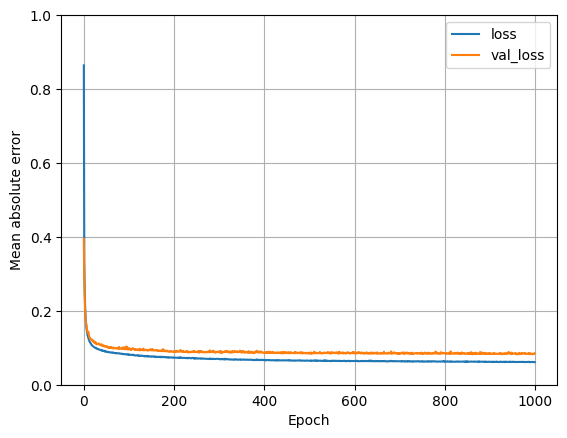

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X13, y, random_state=99, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model8(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    verbose=0,
    batch_size = 64,
    epochs=1000
    )

plot_loss(history)

78/78 [==============================] - 0s 1ms/step
MAE=
0.08512025326490402


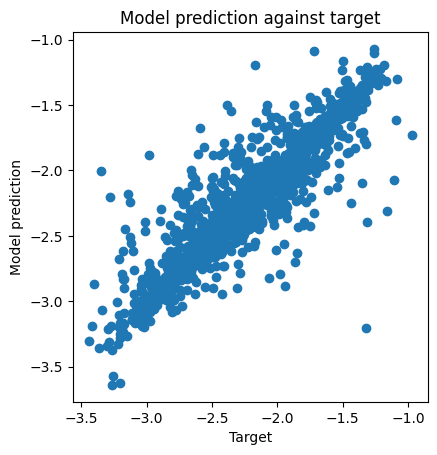

r2 value =
0.8392570303013179


In [ ]:
#fit test set to model
test_predictions = dnn_model.predict(X_test1).flatten()

error=dnn_model.evaluate(X_test1, y_test1, verbose=0)
print('MAE=')
print(error)

#test set performance
a = plt.axes(aspect='equal')
plt.scatter(y_test1, test_predictions)
plt.title("Model prediction against target")
plt.xlabel("Target")
plt.ylabel("Model prediction")
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y_test1, test_predictions)
print('r2 value =')
print(r2)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_23 (Normaliza  (None, 28)               57        
 tion)                                                           
                                                                 
 dense_93 (Dense)            (None, 39)                1131      
                                                                 
 dense_94 (Dense)            (None, 10)                400       
                                                                 
 dense_95 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,599
Trainable params: 1,542
Non-trainable params: 57
_________________________________________________________________


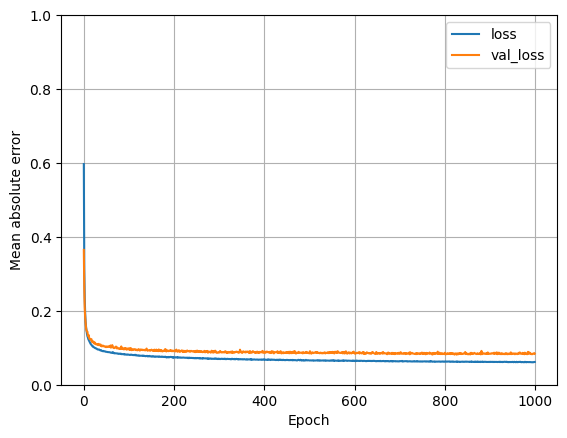

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X13, y, random_state=89, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model8(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    verbose=0,
    batch_size = 64,
    epochs=1000
    )

plot_loss(history)

78/78 [==============================] - 0s 1ms/step
MAE=
0.08414028584957123


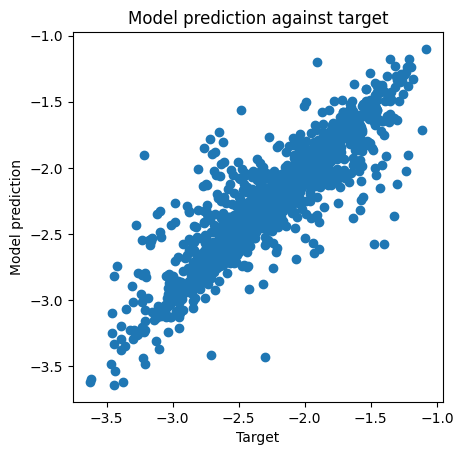

r2 value =
0.847080648747941


In [ ]:
#fit test set to model
test_predictions = dnn_model.predict(X_test1).flatten()

error=dnn_model.evaluate(X_test1, y_test1, verbose=0)
print('MAE=')
print(error)

#test set performance
a = plt.axes(aspect='equal')
plt.scatter(y_test1, test_predictions)
plt.title("Model prediction against target")
plt.xlabel("Target")
plt.ylabel("Model prediction")
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y_test1, test_predictions)
print('r2 value =')
print(r2)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_24 (Normaliza  (None, 28)               57        
 tion)                                                           
                                                                 
 dense_96 (Dense)            (None, 39)                1131      
                                                                 
 dense_97 (Dense)            (None, 10)                400       
                                                                 
 dense_98 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,599
Trainable params: 1,542
Non-trainable params: 57
_________________________________________________________________


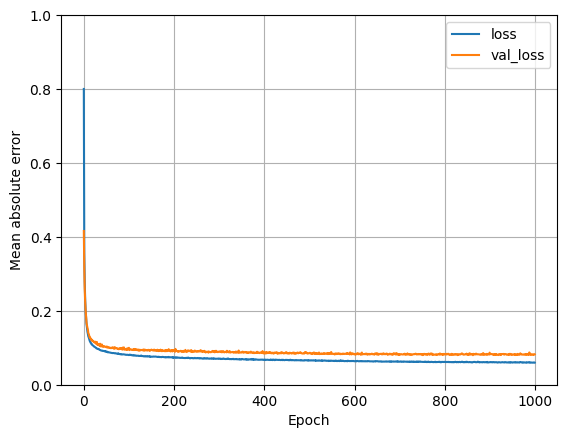

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X13, y, random_state=79, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model8(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    verbose=0,
    batch_size = 64,
    epochs=1000
    )

plot_loss(history)

78/78 [==============================] - 0s 1ms/step
MAE=
0.08038806170225143


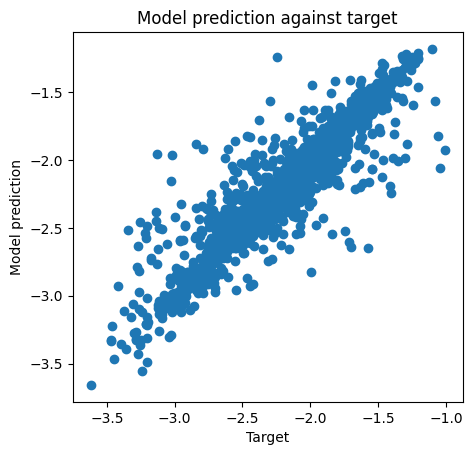

r2 value =
0.8614129311848123


In [ ]:
#fit test set to model
test_predictions = dnn_model.predict(X_test1).flatten()

error=dnn_model.evaluate(X_test1, y_test1, verbose=0)
print('MAE=')
print(error)

#test set performance
a = plt.axes(aspect='equal')
plt.scatter(y_test1, test_predictions)
plt.title("Model prediction against target")
plt.xlabel("Target")
plt.ylabel("Model prediction")
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y_test1, test_predictions)
print('r2 value =')
print(r2)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_25 (Normaliza  (None, 28)               57        
 tion)                                                           
                                                                 
 dense_99 (Dense)            (None, 39)                1131      
                                                                 
 dense_100 (Dense)           (None, 10)                400       
                                                                 
 dense_101 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1,599
Trainable params: 1,542
Non-trainable params: 57
_________________________________________________________________


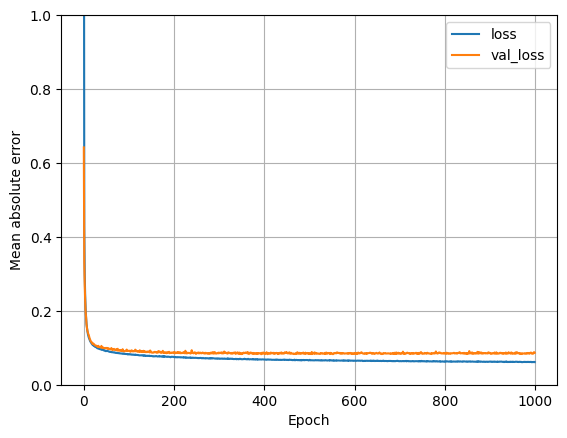

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X13, y, random_state=69, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model8(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    verbose=0,
    batch_size = 64,
    epochs=1000
    )

plot_loss(history)

78/78 [==============================] - 0s 1ms/step
MAE=
0.08571527898311615


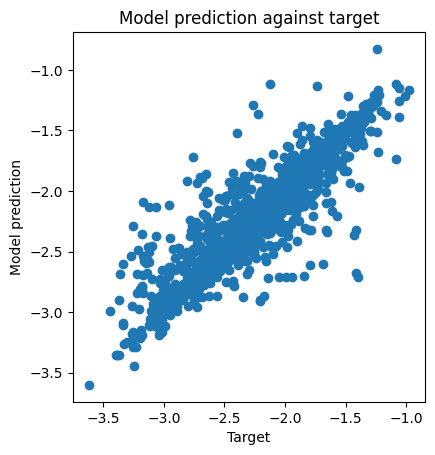

r2 value =
0.8376533422774736


In [ ]:
#fit test set to model
test_predictions = dnn_model.predict(X_test1).flatten()

error=dnn_model.evaluate(X_test1, y_test1, verbose=0)
print('MAE=')
print(error)

#test set performance
a = plt.axes(aspect='equal')
plt.scatter(y_test1, test_predictions)
plt.title("Model prediction against target")
plt.xlabel("Target")
plt.ylabel("Model prediction")
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y_test1, test_predictions)
print('r2 value =')
print(r2)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_26 (Normaliza  (None, 28)               57        
 tion)                                                           
                                                                 
 dense_102 (Dense)           (None, 39)                1131      
                                                                 
 dense_103 (Dense)           (None, 10)                400       
                                                                 
 dense_104 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1,599
Trainable params: 1,542
Non-trainable params: 57
_________________________________________________________________


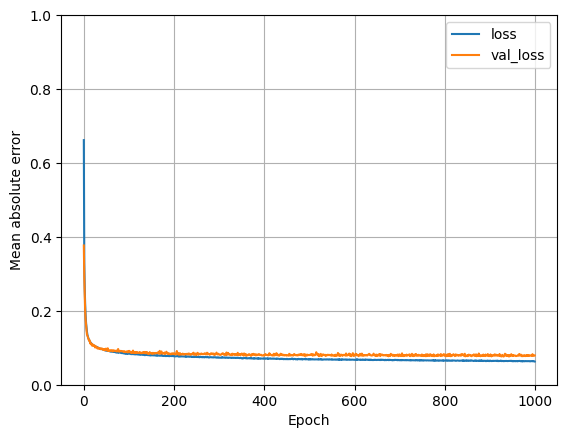

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X13, y, random_state=59, test_size=0.2)
n_features = X_train.shape[1]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model8(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    verbose=0,
    batch_size = 64,
    epochs=1000
    )

plot_loss(history)

78/78 [==============================] - 0s 1ms/step
MAE=
0.08856450766324997


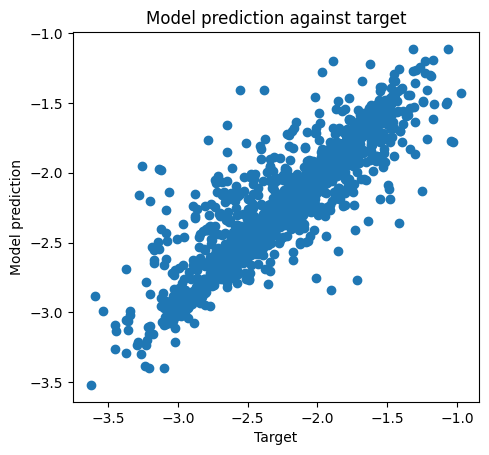

r2 value =
0.8304421677557144


In [ ]:
#fit test set to model
test_predictions = dnn_model.predict(X_test1).flatten()

error=dnn_model.evaluate(X_test1, y_test1, verbose=0)
print('MAE=')
print(error)

#test set performance
a = plt.axes(aspect='equal')
plt.scatter(y_test1, test_predictions)
plt.title("Model prediction against target")
plt.xlabel("Target")
plt.ylabel("Model prediction")
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y_test1, test_predictions)
print('r2 value =')
print(r2)

In [ ]:
t2=time.time()
print ('Time in s',t2-t1)

Time in s 1661.1798660755157
